## **Machine Learning model to predict salary for new employee based on position of work using support vector regression.**
  1. Importing needed libraries
  2. Data preprocessing
  3. Feature scaling
  4. Training SVR model on dataset
  5. Predicting new results
  6. Visualizing SVR results

In [1]:
# 1. importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2. data preprocessing
# 2.1. importing needed dataset
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
# 2.2. splitting dependent & independent variable
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [4]:
# since our dataset is very small, we are not using train_test_split.
# no feature scaling is needed because of polynomial term.

In [5]:
# we have to reshape y to 2d array, because to perform feature scaling -
# standard scaler requires 2d array as input
y = y.reshape(len(y), 1)

In [6]:
# 3. feature scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [7]:
# 4. training svr on the dataset.

from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [8]:
# 5. predicting new result

sc_y.inverse_transform(svr.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

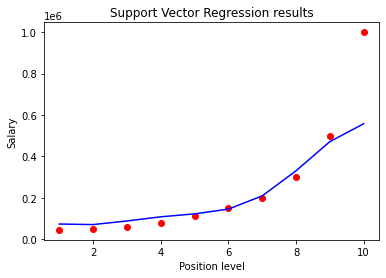

In [9]:
# 6. visualizing simple linear regression result

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svr.predict(X)), color = 'blue')
plt.title('Support Vector Regression results')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()